In [1]:
from keras.callbacks import ModelCheckpoint

In [2]:
import numpy as np
from keras.utils.np_utils import to_categorical

data=np.load('data_train5.npy')
target=np.load('target_train5.npy')

target=to_categorical(target)

print(data[0])
print(target[0])

[0.63829787 0.60962567 0.5978836  0.59042553 0.57219251 0.56382979
 0.58730159 0.59574468 0.59139785 0.61170213]
[1. 0.]


In [3]:
print(data.shape)
print(target.shape)

(3028, 10)
(3028, 2)


In [4]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
import joblib

scaler = MinMaxScaler()
# transform data
data = scaler.fit_transform(data)
joblib.dump(scaler,'scaler-data.sav')

['scaler-data.sav']

In [5]:
data=data.reshape(data.shape[0],data.shape[1],1)

In [6]:
print(data)

[[[0.71662587]
  [0.64352183]
  [0.4994709 ]
  ...
  [0.57964347]
  [0.54960289]
  [0.57822817]]

 [[0.71274055]
  [0.63884109]
  [0.49376344]
  ...
  [0.58172458]
  [0.54865342]
  [0.60344828]]

 [[0.67990962]
  [0.67697183]
  [0.4994709 ]
  ...
  [0.6106958 ]
  [0.61260322]
  [0.61082427]]

 ...

 [[0.21238938]
  [0.22089025]
  [0.17447619]
  ...
  [0.17170111]
  [0.22320117]
  [0.20131846]]

 [[0.1514836 ]
  [0.28426804]
  [0.23215686]
  ...
  [0.39527027]
  [0.24674192]
  [0.29922136]]

 [[0.37776549]
  [0.41795557]
  [0.38583333]
  ...
  [0.48648649]
  [0.46035242]
  [0.44043887]]]


In [7]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

In [8]:

from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

model=Sequential()

model.add(LSTM(units=64,return_sequences=True,input_shape=data.shape[1:]))
model.add(Dropout(0.2))

model.add(LSTM(units=32,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=16,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(target.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 64)            16896     
_________________________________________________________________
dropout (Dropout)            (None, 10, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 32)            12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 32)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3

In [10]:
# from keras.callbacks import ModelCheckpoint

# checkpoint=ModelCheckpoint(filepath='SleppyModels-{epoch:02d}',monitor='val_accuracy',mode='max',save_best_only=True)

# batch_size=8

# history = model.fit(batcher(train_data,train_target),epochs=45,validation_data=batcher(test_data,test_target),batch_size=batch_size,
#          steps_per_epoch=len(train_data)//batch_size,validation_steps=len(test_data)//batch_size,callbacks=[checkpoint])

# model.save('model2_1.h5')

In [11]:
checkpoint=ModelCheckpoint(filepath='SleppyModels-{epoch:02d}',monitor='val_accuracy',mode='max',save_best_only=True)


history=model.fit(data,target,epochs=1000,validation_data=(test_data,test_target),batch_size=8,callbacks=[checkpoint])
model.save('EAR.model')

Epoch 1/1000
379/379 [==============================] - 57s 34ms/step - loss: 0.5968 - accuracy: 0.6671 - val_loss: 0.4252 - val_accuracy: 0.8185


INFO:tensorflow:Assets written to: SleppyModels-01\assets


INFO:tensorflow:Assets written to: SleppyModels-01\assets


Epoch 2/1000
379/379 [==============================] - 9s 25ms/step - loss: 0.4648 - accuracy: 0.7967 - val_loss: 0.4402 - val_accuracy: 0.7987
Epoch 3/1000
379/379 [==============================] - 9s 24ms/step - loss: 0.4690 - accuracy: 0.7872 - val_loss: 0.4142 - val_accuracy: 0.8152
Epoch 4/1000
379/379 [==============================] - 9s 25ms/step - loss: 0.4407 - accuracy: 0.8068 - val_loss: 0.4154 - val_accuracy: 0.8102
Epoch 5/1000
379/379 [==============================] - 9s 25ms/step - loss: 0.4530 - accuracy: 0.7928 - val_loss: 0.4163 - val_accuracy: 0.8119
Epoch 6/1000
379/379 [==============================] - 9s 25ms/step - loss: 0.4401 - accuracy: 0.8057 - val_loss: 0.4204 - val_accuracy: 0.8036
Epoch 7/1000
379/379 [==============================] - 9s 25ms/step - loss: 0.4444 - accuracy: 0.7953 - val_loss: 0.4565 - val_accuracy: 0.8135
Epoch 8/1000
379/379 [==============================] - 9s 24ms/step - loss: 0.4427 - accuracy: 0.8094 - val_loss: 0.4165 - val_ac

INFO:tensorflow:Assets written to: SleppyModels-11\assets


INFO:tensorflow:Assets written to: SleppyModels-11\assets


Epoch 12/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.4335 - accuracy: 0.8120 - val_loss: 0.4173 - val_accuracy: 0.8119
Epoch 13/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.4274 - accuracy: 0.8223 - val_loss: 0.4075 - val_accuracy: 0.8185
Epoch 14/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.4365 - accuracy: 0.8186 - val_loss: 0.4039 - val_accuracy: 0.8185
Epoch 15/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.4328 - accuracy: 0.8109 - val_loss: 0.3968 - val_accuracy: 0.8317
Epoch 16/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.4475 - accuracy: 0.7971 - val_loss: 0.4044 - val_accuracy: 0.8350
Epoch 17/1000
379/379 [==============================] - 12s 30ms/step - loss: 0.4210 - accuracy: 0.8184 - val_loss: 0.3987 - val_accuracy: 0.8366
Epoch 18/1000
379/379 [==============================] - 12s 30ms/step - loss: 0.4292 - accuracy: 0.8155 - val_loss: 0

INFO:tensorflow:Assets written to: SleppyModels-21\assets


INFO:tensorflow:Assets written to: SleppyModels-21\assets


Epoch 22/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.4216 - accuracy: 0.8193 - val_loss: 0.4010 - val_accuracy: 0.8234
Epoch 23/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.4066 - accuracy: 0.8204 - val_loss: 0.3944 - val_accuracy: 0.8300
Epoch 24/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.4298 - accuracy: 0.8038 - val_loss: 0.3813 - val_accuracy: 0.8383
Epoch 25/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.4266 - accuracy: 0.8212 - val_loss: 0.3776 - val_accuracy: 0.8366
Epoch 26/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.4134 - accuracy: 0.8216 - val_loss: 0.3698 - val_accuracy: 0.8449
Epoch 27/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.4255 - accuracy: 0.8031 - val_loss: 0.3692 - val_accuracy: 0.8498


INFO:tensorflow:Assets written to: SleppyModels-27\assets


INFO:tensorflow:Assets written to: SleppyModels-27\assets


Epoch 28/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.4056 - accuracy: 0.8269 - val_loss: 0.3684 - val_accuracy: 0.8432
Epoch 29/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.4082 - accuracy: 0.8255 - val_loss: 0.3644 - val_accuracy: 0.8498
Epoch 30/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3974 - accuracy: 0.8258 - val_loss: 0.3672 - val_accuracy: 0.8350
Epoch 31/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.4017 - accuracy: 0.8202 - val_loss: 0.3639 - val_accuracy: 0.8498
Epoch 32/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.3933 - accuracy: 0.8292 - val_loss: 0.3690 - val_accuracy: 0.8548


INFO:tensorflow:Assets written to: SleppyModels-32\assets


INFO:tensorflow:Assets written to: SleppyModels-32\assets


Epoch 33/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.4114 - accuracy: 0.8122 - val_loss: 0.3644 - val_accuracy: 0.8581


INFO:tensorflow:Assets written to: SleppyModels-33\assets


INFO:tensorflow:Assets written to: SleppyModels-33\assets


Epoch 34/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.4001 - accuracy: 0.8219 - val_loss: 0.3673 - val_accuracy: 0.8482
Epoch 35/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.4107 - accuracy: 0.8236 - val_loss: 0.3630 - val_accuracy: 0.8482
Epoch 36/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.4132 - accuracy: 0.8176 - val_loss: 0.3635 - val_accuracy: 0.8531
Epoch 37/1000
379/379 [==============================] - 10s 28ms/step - loss: 0.4158 - accuracy: 0.8161 - val_loss: 0.3583 - val_accuracy: 0.84985 
Epoch 38/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.3826 - accuracy: 0.8421 - val_loss: 0.3772 - val_accuracy: 0.8366
Epoch 39/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.3922 - accuracy: 0.8223 - val_loss: 0.3798 - val_accuracy: 0.8449
Epoch 40/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.3896 - accuracy: 0.8318 - val_loss:

INFO:tensorflow:Assets written to: SleppyModels-44\assets


INFO:tensorflow:Assets written to: SleppyModels-44\assets


Epoch 45/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3907 - accuracy: 0.8277 - val_loss: 0.3833 - val_accuracy: 0.8333
Epoch 46/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3963 - accuracy: 0.8273 - val_loss: 0.3599 - val_accuracy: 0.8350
Epoch 47/1000
379/379 [==============================] - 15s 38ms/step - loss: 0.3817 - accuracy: 0.8373 - val_loss: 0.3621 - val_accuracy: 0.8465
Epoch 48/1000
379/379 [==============================] - 15s 39ms/step - loss: 0.3955 - accuracy: 0.8235 - val_loss: 0.3626 - val_accuracy: 0.8564
Epoch 49/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.4033 - accuracy: 0.8182 - val_loss: 0.3585 - val_accuracy: 0.8564
Epoch 50/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3817 - accuracy: 0.8306 - val_loss: 0.3654 - val_accuracy: 0.8482
Epoch 51/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.3968 - accuracy: 0.8290 - val_loss: 0

INFO:tensorflow:Assets written to: SleppyModels-86\assets


INFO:tensorflow:Assets written to: SleppyModels-86\assets


Epoch 87/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3911 - accuracy: 0.8278 - val_loss: 0.3546 - val_accuracy: 0.8630
Epoch 88/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.4018 - accuracy: 0.8258 - val_loss: 0.3476 - val_accuracy: 0.8548
Epoch 89/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.3924 - accuracy: 0.8287 - val_loss: 0.3519 - val_accuracy: 0.8614
Epoch 90/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3874 - accuracy: 0.8358 - val_loss: 0.3485 - val_accuracy: 0.8449
Epoch 91/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3734 - accuracy: 0.8262 - val_loss: 0.3573 - val_accuracy: 0.8432
Epoch 92/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3836 - accuracy: 0.8287 - val_loss: 0.3476 - val_accuracy: 0.8548
Epoch 93/1000
379/379 [==============================] - 14s 37ms/step - loss: 0.3792 - accuracy: 0.8380 - val_loss: 0

379/379 [==============================] - 12s 32ms/step - loss: 0.3840 - accuracy: 0.8311 - val_loss: 0.3316 - val_accuracy: 0.8548
Epoch 143/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.3756 - accuracy: 0.8348 - val_loss: 0.3328 - val_accuracy: 0.8581
Epoch 144/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3777 - accuracy: 0.8332 - val_loss: 0.3356 - val_accuracy: 0.8630
Epoch 145/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.3804 - accuracy: 0.8308 - val_loss: 0.3616 - val_accuracy: 0.8449
Epoch 146/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3860 - accuracy: 0.8294 - val_loss: 0.3345 - val_accuracy: 0.8531
Epoch 147/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.3784 - accuracy: 0.8305 - val_loss: 0.3312 - val_accuracy: 0.8581
Epoch 148/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.3803 - accuracy: 0.8308 - val_loss: 0.3278 - 

INFO:tensorflow:Assets written to: SleppyModels-148\assets


INFO:tensorflow:Assets written to: SleppyModels-148\assets


Epoch 149/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3830 - accuracy: 0.8373 - val_loss: 0.3471 - val_accuracy: 0.8531
Epoch 150/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3915 - accuracy: 0.8304 - val_loss: 0.3276 - val_accuracy: 0.8614
Epoch 151/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3780 - accuracy: 0.8285 - val_loss: 0.3291 - val_accuracy: 0.8531
Epoch 152/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3661 - accuracy: 0.8424 - val_loss: 0.3284 - val_accuracy: 0.8548
Epoch 153/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3719 - accuracy: 0.8360 - val_loss: 0.3308 - val_accuracy: 0.8663
Epoch 154/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3686 - accuracy: 0.8317 - val_loss: 0.3233 - val_accuracy: 0.8597
Epoch 155/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3670 - accuracy: 0.8419 - val_

INFO:tensorflow:Assets written to: SleppyModels-175\assets


INFO:tensorflow:Assets written to: SleppyModels-175\assets


Epoch 176/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3640 - accuracy: 0.8486 - val_loss: 0.3155 - val_accuracy: 0.8696
Epoch 177/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3637 - accuracy: 0.8366 - val_loss: 0.3244 - val_accuracy: 0.8581 0.3637 - accu
Epoch 178/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3829 - accuracy: 0.8346 - val_loss: 0.3353 - val_accuracy: 0.8597
Epoch 179/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3506 - accuracy: 0.8552 - val_loss: 0.3201 - val_accuracy: 0.8581
Epoch 180/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3555 - accuracy: 0.8417 - val_loss: 0.3171 - val_accuracy: 0.8729


INFO:tensorflow:Assets written to: SleppyModels-180\assets


INFO:tensorflow:Assets written to: SleppyModels-180\assets


Epoch 181/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3575 - accuracy: 0.8377 - val_loss: 0.3141 - val_accuracy: 0.8729
Epoch 182/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3703 - accuracy: 0.8295 - val_loss: 0.3165 - val_accuracy: 0.8564
Epoch 183/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3449 - accuracy: 0.8422 - val_loss: 0.3102 - val_accuracy: 0.8746


INFO:tensorflow:Assets written to: SleppyModels-183\assets


INFO:tensorflow:Assets written to: SleppyModels-183\assets


Epoch 184/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3350 - accuracy: 0.8492 - val_loss: 0.3136 - val_accuracy: 0.8647
Epoch 185/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3596 - accuracy: 0.8453 - val_loss: 0.3217 - val_accuracy: 0.8531
Epoch 186/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3491 - accuracy: 0.8404 - val_loss: 0.3126 - val_accuracy: 0.8713
Epoch 187/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3714 - accuracy: 0.8300 - val_loss: 0.3084 - val_accuracy: 0.8680
Epoch 188/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3582 - accuracy: 0.8333 - val_loss: 0.3054 - val_accuracy: 0.8729
Epoch 189/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3368 - accuracy: 0.8542 - val_loss: 0.3097 - val_accuracy: 0.8729
Epoch 190/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3511 - accuracy: 0.8477 - val_

INFO:tensorflow:Assets written to: SleppyModels-191\assets


INFO:tensorflow:Assets written to: SleppyModels-191\assets


Epoch 192/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3582 - accuracy: 0.8394 - val_loss: 0.3070 - val_accuracy: 0.8713
Epoch 193/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3506 - accuracy: 0.8483 - val_loss: 0.3240 - val_accuracy: 0.8647
Epoch 194/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3781 - accuracy: 0.8267 - val_loss: 0.3227 - val_accuracy: 0.8746
Epoch 195/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3664 - accuracy: 0.8411 - val_loss: 0.3089 - val_accuracy: 0.8696
Epoch 196/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3536 - accuracy: 0.8454 - val_loss: 0.3098 - val_accuracy: 0.8581
Epoch 197/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3565 - accuracy: 0.8437 - val_loss: 0.3115 - val_accuracy: 0.8680
Epoch 198/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3593 - accuracy: 0.8423 - val_

INFO:tensorflow:Assets written to: SleppyModels-202\assets


INFO:tensorflow:Assets written to: SleppyModels-202\assets


Epoch 203/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3494 - accuracy: 0.8525 - val_loss: 0.3124 - val_accuracy: 0.8647
Epoch 204/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3476 - accuracy: 0.8449 - val_loss: 0.3012 - val_accuracy: 0.8696
Epoch 205/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3591 - accuracy: 0.8451 - val_loss: 0.3042 - val_accuracy: 0.8647
Epoch 206/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3307 - accuracy: 0.8588 - val_loss: 0.3036 - val_accuracy: 0.8713
Epoch 207/1000
379/379 [==============================] - 15s 40ms/step - loss: 0.3503 - accuracy: 0.8428 - val_loss: 0.2977 - val_accuracy: 0.8828


INFO:tensorflow:Assets written to: SleppyModels-207\assets


INFO:tensorflow:Assets written to: SleppyModels-207\assets


Epoch 208/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3391 - accuracy: 0.8466 - val_loss: 0.2993 - val_accuracy: 0.8597
Epoch 209/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3437 - accuracy: 0.8457 - val_loss: 0.3026 - val_accuracy: 0.8614
Epoch 210/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3218 - accuracy: 0.8644 - val_loss: 0.3111 - val_accuracy: 0.8696
Epoch 211/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3557 - accuracy: 0.8450 - val_loss: 0.2982 - val_accuracy: 0.8729
Epoch 212/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3506 - accuracy: 0.8366 - val_loss: 0.3076 - val_accuracy: 0.8597
Epoch 213/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3358 - accuracy: 0.8537 - val_loss: 0.3141 - val_accuracy: 0.8597
Epoch 214/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3281 - accuracy: 0.8553 - val_

INFO:tensorflow:Assets written to: SleppyModels-237\assets


INFO:tensorflow:Assets written to: SleppyModels-237\assets


Epoch 238/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3245 - accuracy: 0.8553 - val_loss: 0.2959 - val_accuracy: 0.8746
Epoch 239/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3434 - accuracy: 0.8463 - val_loss: 0.2903 - val_accuracy: 0.8861


INFO:tensorflow:Assets written to: SleppyModels-239\assets


INFO:tensorflow:Assets written to: SleppyModels-239\assets


Epoch 240/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3157 - accuracy: 0.8538 - val_loss: 0.2914 - val_accuracy: 0.8729
Epoch 241/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3326 - accuracy: 0.8579 - val_loss: 0.2898 - val_accuracy: 0.8746
Epoch 242/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3290 - accuracy: 0.8499 - val_loss: 0.2812 - val_accuracy: 0.8861
Epoch 243/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3316 - accuracy: 0.8524 - val_loss: 0.2897 - val_accuracy: 0.8795
Epoch 244/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3152 - accuracy: 0.8605 - val_loss: 0.2801 - val_accuracy: 0.8861
Epoch 245/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3165 - accuracy: 0.8676 - val_loss: 0.2789 - val_accuracy: 0.8812
Epoch 246/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3186 - accuracy: 0.8581 - val_

INFO:tensorflow:Assets written to: SleppyModels-259\assets


INFO:tensorflow:Assets written to: SleppyModels-259\assets


Epoch 260/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3264 - accuracy: 0.8547 - val_loss: 0.2855 - val_accuracy: 0.8729
Epoch 261/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3298 - accuracy: 0.8604 - val_loss: 0.2749 - val_accuracy: 0.8878
Epoch 262/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3259 - accuracy: 0.8604 - val_loss: 0.2717 - val_accuracy: 0.8845
Epoch 263/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3366 - accuracy: 0.8538 - val_loss: 0.2707 - val_accuracy: 0.8927


INFO:tensorflow:Assets written to: SleppyModels-263\assets


INFO:tensorflow:Assets written to: SleppyModels-263\assets


Epoch 264/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3251 - accuracy: 0.8596 - val_loss: 0.2691 - val_accuracy: 0.8911
Epoch 265/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3334 - accuracy: 0.8558 - val_loss: 0.2697 - val_accuracy: 0.8927
Epoch 266/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3081 - accuracy: 0.8734 - val_loss: 0.2835 - val_accuracy: 0.8795
Epoch 267/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3125 - accuracy: 0.8653 - val_loss: 0.2890 - val_accuracy: 0.8680
Epoch 268/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3263 - accuracy: 0.8638 - val_loss: 0.2753 - val_accuracy: 0.8812
Epoch 269/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3223 - accuracy: 0.8534 - val_loss: 0.2770 - val_accuracy: 0.8828
Epoch 270/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3091 - accuracy: 0.8750 - val_

INFO:tensorflow:Assets written to: SleppyModels-280\assets


INFO:tensorflow:Assets written to: SleppyModels-280\assets


Epoch 281/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3143 - accuracy: 0.8566 - val_loss: 0.2676 - val_accuracy: 0.8878
Epoch 282/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3128 - accuracy: 0.8614 - val_loss: 0.2674 - val_accuracy: 0.8779
Epoch 283/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3186 - accuracy: 0.8623 - val_loss: 0.4553 - val_accuracy: 0.8317
Epoch 284/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.4113 - accuracy: 0.8312 - val_loss: 0.2727 - val_accuracy: 0.8795
Epoch 285/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3024 - accuracy: 0.8660 - val_loss: 0.2627 - val_accuracy: 0.8878
Epoch 286/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.3139 - accuracy: 0.8588 - val_loss: 0.2618 - val_accuracy: 0.8812
Epoch 287/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3021 - accuracy: 0.8696 - val_

INFO:tensorflow:Assets written to: SleppyModels-287\assets


INFO:tensorflow:Assets written to: SleppyModels-287\assets


Epoch 288/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3223 - accuracy: 0.8629 - val_loss: 0.2682 - val_accuracy: 0.8746
Epoch 289/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.2974 - accuracy: 0.8617 - val_loss: 0.2632 - val_accuracy: 0.8927
Epoch 290/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3270 - accuracy: 0.8527 - val_loss: 0.2567 - val_accuracy: 0.8944
Epoch 291/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3104 - accuracy: 0.8606 - val_loss: 0.2709 - val_accuracy: 0.8828
Epoch 292/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.2954 - accuracy: 0.8684 - val_loss: 0.2689 - val_accuracy: 0.8927
Epoch 293/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3058 - accuracy: 0.8613 - val_loss: 0.2636 - val_accuracy: 0.8977


INFO:tensorflow:Assets written to: SleppyModels-293\assets


INFO:tensorflow:Assets written to: SleppyModels-293\assets


Epoch 294/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.2948 - accuracy: 0.8746 - val_loss: 0.2604 - val_accuracy: 0.8944
Epoch 295/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3067 - accuracy: 0.8656 - val_loss: 0.2578 - val_accuracy: 0.8960
Epoch 296/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.2898 - accuracy: 0.8739 - val_loss: 0.2592 - val_accuracy: 0.8878
Epoch 297/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3102 - accuracy: 0.8639 - val_loss: 0.2562 - val_accuracy: 0.8993


INFO:tensorflow:Assets written to: SleppyModels-297\assets


INFO:tensorflow:Assets written to: SleppyModels-297\assets


Epoch 298/1000
379/379 [==============================] - 15s 40ms/step - loss: 0.2851 - accuracy: 0.8775 - val_loss: 0.2607 - val_accuracy: 0.8861
Epoch 299/1000
379/379 [==============================] - 14s 37ms/step - loss: 0.3176 - accuracy: 0.8616 - val_loss: 0.2566 - val_accuracy: 0.8861
Epoch 300/1000
379/379 [==============================] - 14s 38ms/step - loss: 0.3042 - accuracy: 0.8591 - val_loss: 0.2649 - val_accuracy: 0.8828
Epoch 301/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.2967 - accuracy: 0.8575 - val_loss: 0.2539 - val_accuracy: 0.9010


INFO:tensorflow:Assets written to: SleppyModels-301\assets


INFO:tensorflow:Assets written to: SleppyModels-301\assets


Epoch 302/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.3120 - accuracy: 0.8584 - val_loss: 0.2587 - val_accuracy: 0.8878
Epoch 303/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.2963 - accuracy: 0.8584 - val_loss: 0.2947 - val_accuracy: 0.8696
Epoch 304/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3109 - accuracy: 0.8625 - val_loss: 0.2693 - val_accuracy: 0.8762
Epoch 305/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3095 - accuracy: 0.8547 - val_loss: 0.2590 - val_accuracy: 0.8977
Epoch 306/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.2967 - accuracy: 0.8738 - val_loss: 0.2672 - val_accuracy: 0.8861
Epoch 307/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.3024 - accuracy: 0.8621 - val_loss: 0.2499 - val_accuracy: 0.9010
Epoch 308/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.3122 - accuracy: 0.8610 - val_

INFO:tensorflow:Assets written to: SleppyModels-308\assets


INFO:tensorflow:Assets written to: SleppyModels-308\assets


Epoch 309/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3101 - accuracy: 0.8654 - val_loss: 0.2505 - val_accuracy: 0.8993
Epoch 310/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3097 - accuracy: 0.8668 - val_loss: 0.2501 - val_accuracy: 0.9026
Epoch 311/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3026 - accuracy: 0.8694 - val_loss: 0.2789 - val_accuracy: 0.8779
Epoch 312/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3107 - accuracy: 0.8573 - val_loss: 0.2481 - val_accuracy: 0.8977
Epoch 313/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.2855 - accuracy: 0.8663 - val_loss: 0.2500 - val_accuracy: 0.8861
Epoch 314/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.3041 - accuracy: 0.8694 - val_loss: 0.2564 - val_accuracy: 0.8894
Epoch 315/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.2883 - accuracy: 0.8707 - val_

INFO:tensorflow:Assets written to: SleppyModels-336\assets


INFO:tensorflow:Assets written to: SleppyModels-336\assets


Epoch 337/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2635 - accuracy: 0.8846 - val_loss: 0.2417 - val_accuracy: 0.8960
Epoch 338/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2831 - accuracy: 0.8797 - val_loss: 0.2484 - val_accuracy: 0.8993
Epoch 339/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2973 - accuracy: 0.8728 - val_loss: 0.2481 - val_accuracy: 0.8960
Epoch 340/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.3121 - accuracy: 0.8512 - val_loss: 0.2424 - val_accuracy: 0.9026
Epoch 341/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2657 - accuracy: 0.8868 - val_loss: 0.2429 - val_accuracy: 0.9010
Epoch 342/1000
379/379 [==============================] - 13s 36ms/step - loss: 0.2822 - accuracy: 0.8671 - val_loss: 0.2342 - val_accuracy: 0.9076


INFO:tensorflow:Assets written to: SleppyModels-342\assets


INFO:tensorflow:Assets written to: SleppyModels-342\assets


Epoch 343/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2963 - accuracy: 0.8650 - val_loss: 0.2467 - val_accuracy: 0.9010
Epoch 344/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2943 - accuracy: 0.8691 - val_loss: 0.2406 - val_accuracy: 0.9076
Epoch 345/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.3129 - accuracy: 0.8731 - val_loss: 0.2423 - val_accuracy: 0.9010
Epoch 346/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2829 - accuracy: 0.8667 - val_loss: 0.2376 - val_accuracy: 0.8977
Epoch 347/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2979 - accuracy: 0.8698 - val_loss: 0.2535 - val_accuracy: 0.8977
Epoch 348/1000
379/379 [==============================] - 10s 26ms/step - loss: 0.2912 - accuracy: 0.8699 - val_loss: 0.2387 - val_accuracy: 0.9026
Epoch 349/1000
379/379 [==============================] - 10s 26ms/step - loss: 0.3018 - accuracy: 0.8738 - val_

INFO:tensorflow:Assets written to: SleppyModels-382\assets


INFO:tensorflow:Assets written to: SleppyModels-382\assets


Epoch 383/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.2584 - accuracy: 0.8801 - val_loss: 0.2231 - val_accuracy: 0.9043
Epoch 384/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2819 - accuracy: 0.8683 - val_loss: 0.2240 - val_accuracy: 0.9043
Epoch 385/1000
379/379 [==============================] - 10s 26ms/step - loss: 0.2897 - accuracy: 0.8660 - val_loss: 0.2417 - val_accuracy: 0.9010
Epoch 386/1000
379/379 [==============================] - 10s 26ms/step - loss: 0.2698 - accuracy: 0.8822 - val_loss: 0.2356 - val_accuracy: 0.8944
Epoch 387/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.2681 - accuracy: 0.8878 - val_loss: 0.2258 - val_accuracy: 0.8977
Epoch 388/1000
379/379 [==============================] - 10s 26ms/step - loss: 0.2618 - accuracy: 0.8749 - val_loss: 0.2299 - val_accuracy: 0.8944
Epoch 389/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.2845 - accuracy: 0.8720 - val_

INFO:tensorflow:Assets written to: SleppyModels-420\assets


INFO:tensorflow:Assets written to: SleppyModels-420\assets


Epoch 421/1000
379/379 [==============================] - 15s 40ms/step - loss: 0.2684 - accuracy: 0.8764 - val_loss: 0.2066 - val_accuracy: 0.9125
Epoch 422/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2962 - accuracy: 0.8678 - val_loss: 0.2117 - val_accuracy: 0.9059
Epoch 423/1000
379/379 [==============================] - 16s 43ms/step - loss: 0.2551 - accuracy: 0.8915 - val_loss: 0.2226 - val_accuracy: 0.9043
Epoch 424/1000
379/379 [==============================] - 24s 64ms/step - loss: 0.2492 - accuracy: 0.8877 - val_loss: 0.2141 - val_accuracy: 0.9125
Epoch 425/1000
379/379 [==============================] - 19s 50ms/step - loss: 0.2553 - accuracy: 0.8841 - val_loss: 0.2101 - val_accuracy: 0.9125
Epoch 426/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.2617 - accuracy: 0.8704 - val_loss: 0.2099 - val_accuracy: 0.9109
Epoch 427/1000
379/379 [==============================] - 17s 44ms/step - loss: 0.2698 - accuracy: 0.8769 - val_

INFO:tensorflow:Assets written to: SleppyModels-465\assets


INFO:tensorflow:Assets written to: SleppyModels-465\assets


Epoch 466/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.2312 - accuracy: 0.8964 - val_loss: 0.1960 - val_accuracy: 0.9109
Epoch 467/1000
379/379 [==============================] - 18s 47ms/step - loss: 0.2357 - accuracy: 0.8847 - val_loss: 0.2015 - val_accuracy: 0.9125
Epoch 468/1000
379/379 [==============================] - 18s 49ms/step - loss: 0.2400 - accuracy: 0.8954 - val_loss: 0.1931 - val_accuracy: 0.9092
Epoch 469/1000
379/379 [==============================] - 17s 45ms/step - loss: 0.2362 - accuracy: 0.8864 - val_loss: 0.2090 - val_accuracy: 0.9125
Epoch 470/1000
379/379 [==============================] - 18s 47ms/step - loss: 0.2475 - accuracy: 0.8902 - val_loss: 0.1947 - val_accuracy: 0.9125
Epoch 471/1000
379/379 [==============================] - 17s 45ms/step - loss: 0.2774 - accuracy: 0.8826 - val_loss: 0.2087 - val_accuracy: 0.9010
Epoch 472/1000
379/379 [==============================] - 16s 43ms/step - loss: 0.2572 - accuracy: 0.8785 - val_

INFO:tensorflow:Assets written to: SleppyModels-473\assets


INFO:tensorflow:Assets written to: SleppyModels-473\assets


Epoch 474/1000
379/379 [==============================] - 17s 45ms/step - loss: 0.2469 - accuracy: 0.8872 - val_loss: 0.1985 - val_accuracy: 0.9125
Epoch 475/1000
379/379 [==============================] - 16s 42ms/step - loss: 0.2577 - accuracy: 0.8914 - val_loss: 0.2054 - val_accuracy: 0.9059
Epoch 476/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2482 - accuracy: 0.8786 - val_loss: 0.1949 - val_accuracy: 0.9125
Epoch 477/1000
379/379 [==============================] - 17s 44ms/step - loss: 0.2333 - accuracy: 0.8868 - val_loss: 0.2093 - val_accuracy: 0.8993
Epoch 478/1000
379/379 [==============================] - 20s 54ms/step - loss: 0.2444 - accuracy: 0.8915 - val_loss: 0.1968 - val_accuracy: 0.9125
Epoch 479/1000
379/379 [==============================] - 30s 78ms/step - loss: 0.2330 - accuracy: 0.8905 - val_loss: 0.2040 - val_accuracy: 0.9092
Epoch 480/1000
379/379 [==============================] - 29s 77ms/step - loss: 0.2510 - accuracy: 0.8881 - val_

INFO:tensorflow:Assets written to: SleppyModels-480\assets


INFO:tensorflow:Assets written to: SleppyModels-480\assets


Epoch 481/1000
379/379 [==============================] - 19s 50ms/step - loss: 0.2412 - accuracy: 0.8867 - val_loss: 0.1917 - val_accuracy: 0.9142
Epoch 482/1000
379/379 [==============================] - 19s 50ms/step - loss: 0.2484 - accuracy: 0.8869 - val_loss: 0.1907 - val_accuracy: 0.9208


INFO:tensorflow:Assets written to: SleppyModels-482\assets


INFO:tensorflow:Assets written to: SleppyModels-482\assets


Epoch 483/1000
379/379 [==============================] - 16s 43ms/step - loss: 0.2306 - accuracy: 0.8895 - val_loss: 0.1948 - val_accuracy: 0.9125
Epoch 484/1000
379/379 [==============================] - 15s 38ms/step - loss: 0.2381 - accuracy: 0.8867 - val_loss: 0.1977 - val_accuracy: 0.9059
Epoch 485/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.2397 - accuracy: 0.8917 - val_loss: 0.1993 - val_accuracy: 0.9092
Epoch 486/1000
379/379 [==============================] - 15s 39ms/step - loss: 0.2317 - accuracy: 0.8872 - val_loss: 0.1898 - val_accuracy: 0.9142
Epoch 487/1000
379/379 [==============================] - 17s 46ms/step - loss: 0.2420 - accuracy: 0.8903 - val_loss: 0.1966 - val_accuracy: 0.9125
Epoch 488/1000
379/379 [==============================] - 19s 51ms/step - loss: 0.2400 - accuracy: 0.8853 - val_loss: 0.1918 - val_accuracy: 0.9076
Epoch 489/1000
379/379 [==============================] - 17s 45ms/step - loss: 0.2240 - accuracy: 0.8989 - val_

INFO:tensorflow:Assets written to: SleppyModels-517\assets


INFO:tensorflow:Assets written to: SleppyModels-517\assets


Epoch 518/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.2285 - accuracy: 0.8914 - val_loss: 0.1841 - val_accuracy: 0.9208
Epoch 519/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2347 - accuracy: 0.8854 - val_loss: 0.1884 - val_accuracy: 0.9142
Epoch 520/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.2175 - accuracy: 0.9005 - val_loss: 0.1806 - val_accuracy: 0.9208
Epoch 521/1000
379/379 [==============================] - 17s 45ms/step - loss: 0.2153 - accuracy: 0.8980 - val_loss: 0.1779 - val_accuracy: 0.9142
Epoch 522/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.2256 - accuracy: 0.9011 - val_loss: 0.2353 - val_accuracy: 0.8894
Epoch 523/1000
379/379 [==============================] - 13s 33ms/step - loss: 0.2398 - accuracy: 0.8818 - val_loss: 0.1781 - val_accuracy: 0.9191
Epoch 524/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.2569 - accuracy: 0.8890 - val_

379/379 [==============================] - 11s 30ms/step - loss: 0.2124 - accuracy: 0.9027 - val_loss: 0.1883 - val_accuracy: 0.9010
Epoch 573/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2110 - accuracy: 0.9052 - val_loss: 0.1729 - val_accuracy: 0.9175
Epoch 574/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.2414 - accuracy: 0.8831 - val_loss: 0.1693 - val_accuracy: 0.9208
Epoch 575/1000
379/379 [==============================] - 13s 34ms/step - loss: 0.1906 - accuracy: 0.9135 - val_loss: 0.1726 - val_accuracy: 0.9208
Epoch 576/1000
379/379 [==============================] - 12s 30ms/step - loss: 0.2267 - accuracy: 0.8973 - val_loss: 0.1698 - val_accuracy: 0.9191
Epoch 577/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2160 - accuracy: 0.8992 - val_loss: 0.1701 - val_accuracy: 0.9208
Epoch 578/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1932 - accuracy: 0.9074 - val_loss: 0.1640 - 

INFO:tensorflow:Assets written to: SleppyModels-592\assets


INFO:tensorflow:Assets written to: SleppyModels-592\assets


Epoch 593/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2148 - accuracy: 0.8913 - val_loss: 0.1580 - val_accuracy: 0.9208
Epoch 594/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1953 - accuracy: 0.9040 - val_loss: 0.1925 - val_accuracy: 0.9092
Epoch 595/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2320 - accuracy: 0.8930 - val_loss: 0.1696 - val_accuracy: 0.9208
Epoch 596/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2114 - accuracy: 0.8982 - val_loss: 0.1641 - val_accuracy: 0.9224
Epoch 597/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.2167 - accuracy: 0.8986 - val_loss: 0.1592 - val_accuracy: 0.9175
Epoch 598/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2103 - accuracy: 0.9016 - val_loss: 0.1654 - val_accuracy: 0.9158
Epoch 599/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2111 - accuracy: 0.9064 - val_

INFO:tensorflow:Assets written to: SleppyModels-602\assets


INFO:tensorflow:Assets written to: SleppyModels-602\assets


Epoch 603/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1937 - accuracy: 0.9123 - val_loss: 0.1751 - val_accuracy: 0.9175
Epoch 604/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2075 - accuracy: 0.9007 - val_loss: 0.1636 - val_accuracy: 0.9175
Epoch 605/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1914 - accuracy: 0.9045 - val_loss: 0.1654 - val_accuracy: 0.9208
Epoch 606/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.2160 - accuracy: 0.8956 - val_loss: 0.1686 - val_accuracy: 0.9109
Epoch 607/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2246 - accuracy: 0.8852 - val_loss: 0.1830 - val_accuracy: 0.9191
Epoch 608/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2116 - accuracy: 0.8989 - val_loss: 0.1557 - val_accuracy: 0.9257
Epoch 609/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1997 - accuracy: 0.9078 - val_

INFO:tensorflow:Assets written to: SleppyModels-642\assets


INFO:tensorflow:Assets written to: SleppyModels-642\assets


Epoch 643/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1925 - accuracy: 0.9083 - val_loss: 0.1488 - val_accuracy: 0.9290
Epoch 644/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.1974 - accuracy: 0.9073 - val_loss: 0.1522 - val_accuracy: 0.9208
Epoch 645/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.1904 - accuracy: 0.9062 - val_loss: 0.1510 - val_accuracy: 0.9290
Epoch 646/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2183 - accuracy: 0.8977 - val_loss: 0.1561 - val_accuracy: 0.9257
Epoch 647/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2056 - accuracy: 0.9062 - val_loss: 0.1543 - val_accuracy: 0.9191
Epoch 648/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2043 - accuracy: 0.9066 - val_loss: 0.1553 - val_accuracy: 0.9274
Epoch 649/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2178 - accuracy: 0.8895 - val_

INFO:tensorflow:Assets written to: SleppyModels-674\assets


INFO:tensorflow:Assets written to: SleppyModels-674\assets


Epoch 675/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2016 - accuracy: 0.9097 - val_loss: 0.1501 - val_accuracy: 0.9257
Epoch 676/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1793 - accuracy: 0.9209 - val_loss: 0.1445 - val_accuracy: 0.9224
Epoch 677/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1871 - accuracy: 0.9060 - val_loss: 0.1447 - val_accuracy: 0.9241
Epoch 678/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.1894 - accuracy: 0.9145 - val_loss: 0.1386 - val_accuracy: 0.9274
Epoch 679/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1937 - accuracy: 0.9062 - val_loss: 0.1585 - val_accuracy: 0.9224
Epoch 680/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1927 - accuracy: 0.9111 - val_loss: 0.1488 - val_accuracy: 0.9241
Epoch 681/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2046 - accuracy: 0.8958 - val_

INFO:tensorflow:Assets written to: SleppyModels-692\assets


INFO:tensorflow:Assets written to: SleppyModels-692\assets


Epoch 693/1000
379/379 [==============================] - 10s 28ms/step - loss: 0.1818 - accuracy: 0.9178 - val_loss: 0.1378 - val_accuracy: 0.9323
Epoch 694/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1842 - accuracy: 0.9142 - val_loss: 0.1361 - val_accuracy: 0.9274
Epoch 695/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1733 - accuracy: 0.9179 - val_loss: 0.1283 - val_accuracy: 0.9340
Epoch 696/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2021 - accuracy: 0.9045 - val_loss: 0.1657 - val_accuracy: 0.9142
Epoch 697/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2090 - accuracy: 0.9072 - val_loss: 0.1447 - val_accuracy: 0.9241
Epoch 698/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1803 - accuracy: 0.9105 - val_loss: 0.1298 - val_accuracy: 0.9307
Epoch 699/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.1899 - accuracy: 0.8958 - val_

INFO:tensorflow:Assets written to: SleppyModels-699\assets


INFO:tensorflow:Assets written to: SleppyModels-699\assets


Epoch 700/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1862 - accuracy: 0.9059 - val_loss: 0.1327 - val_accuracy: 0.9307
Epoch 701/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1805 - accuracy: 0.9138 - val_loss: 0.1425 - val_accuracy: 0.9208
Epoch 702/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1822 - accuracy: 0.9183 - val_loss: 0.1356 - val_accuracy: 0.9307
Epoch 703/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1764 - accuracy: 0.9128 - val_loss: 0.1381 - val_accuracy: 0.9274
Epoch 704/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1810 - accuracy: 0.9128 - val_loss: 0.1480 - val_accuracy: 0.9241
Epoch 705/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.1673 - accuracy: 0.9192 - val_loss: 0.1319 - val_accuracy: 0.9340
Epoch 706/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2083 - accuracy: 0.9023 - val_

INFO:tensorflow:Assets written to: SleppyModels-708\assets


INFO:tensorflow:Assets written to: SleppyModels-708\assets


Epoch 709/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1766 - accuracy: 0.9141 - val_loss: 0.1328 - val_accuracy: 0.9257
Epoch 710/1000
379/379 [==============================] - 10s 28ms/step - loss: 0.2053 - accuracy: 0.9055 - val_loss: 0.1558 - val_accuracy: 0.9340
Epoch 711/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1886 - accuracy: 0.9186 - val_loss: 0.1416 - val_accuracy: 0.9274
Epoch 712/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1954 - accuracy: 0.9130 - val_loss: 0.1521 - val_accuracy: 0.9158
Epoch 713/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1793 - accuracy: 0.9060 - val_loss: 0.1302 - val_accuracy: 0.9290
Epoch 714/1000
379/379 [==============================] - 10s 28ms/step - loss: 0.1761 - accuracy: 0.9156 - val_loss: 0.1278 - val_accuracy: 0.9290
Epoch 715/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1641 - accuracy: 0.9255 - val_

INFO:tensorflow:Assets written to: SleppyModels-749\assets


INFO:tensorflow:Assets written to: SleppyModels-749\assets


Epoch 750/1000
379/379 [==============================] - 19s 49ms/step - loss: 0.2274 - accuracy: 0.8965 - val_loss: 0.1220 - val_accuracy: 0.9389
Epoch 751/1000
379/379 [==============================] - 17s 44ms/step - loss: 0.1920 - accuracy: 0.9123 - val_loss: 0.1351 - val_accuracy: 0.9290
Epoch 752/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.1673 - accuracy: 0.9189 - val_loss: 0.1276 - val_accuracy: 0.9323
Epoch 753/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1838 - accuracy: 0.9188 - val_loss: 0.1258 - val_accuracy: 0.9373
Epoch 754/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1732 - accuracy: 0.9199 - val_loss: 0.1317 - val_accuracy: 0.9356
Epoch 755/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1957 - accuracy: 0.9137 - val_loss: 0.1261 - val_accuracy: 0.9290
Epoch 756/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.2053 - accuracy: 0.9032 - val_

INFO:tensorflow:Assets written to: SleppyModels-782\assets


INFO:tensorflow:Assets written to: SleppyModels-782\assets


Epoch 783/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1633 - accuracy: 0.9246 - val_loss: 0.1209 - val_accuracy: 0.9439
Epoch 784/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.2014 - accuracy: 0.9098 - val_loss: 0.1137 - val_accuracy: 0.9406
Epoch 785/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1596 - accuracy: 0.9209 - val_loss: 0.1113 - val_accuracy: 0.9422
Epoch 786/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1712 - accuracy: 0.9222 - val_loss: 0.1273 - val_accuracy: 0.9356
Epoch 787/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1858 - accuracy: 0.9195 - val_loss: 0.1351 - val_accuracy: 0.9257
Epoch 788/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1936 - accuracy: 0.9162 - val_loss: 0.1188 - val_accuracy: 0.9356
Epoch 789/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1786 - accuracy: 0.9194 - val_

INFO:tensorflow:Assets written to: SleppyModels-795\assets


INFO:tensorflow:Assets written to: SleppyModels-795\assets


Epoch 796/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1673 - accuracy: 0.9272 - val_loss: 0.1233 - val_accuracy: 0.9389
Epoch 797/1000
379/379 [==============================] - 11s 30ms/step - loss: 0.1518 - accuracy: 0.9284 - val_loss: 0.1207 - val_accuracy: 0.9373
Epoch 798/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.2160 - accuracy: 0.8968 - val_loss: 0.1174 - val_accuracy: 0.9505


INFO:tensorflow:Assets written to: SleppyModels-798\assets


INFO:tensorflow:Assets written to: SleppyModels-798\assets


Epoch 799/1000
379/379 [==============================] - 11s 29ms/step - loss: 0.1569 - accuracy: 0.9326 - val_loss: 0.1191 - val_accuracy: 0.9439
Epoch 800/1000
379/379 [==============================] - 12s 30ms/step - loss: 0.1489 - accuracy: 0.9219 - val_loss: 0.1275 - val_accuracy: 0.9373
Epoch 801/1000
379/379 [==============================] - 12s 32ms/step - loss: 0.1914 - accuracy: 0.9098 - val_loss: 0.1267 - val_accuracy: 0.9389
Epoch 802/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1541 - accuracy: 0.9278 - val_loss: 0.1132 - val_accuracy: 0.9422
Epoch 803/1000
379/379 [==============================] - 14s 38ms/step - loss: 0.1532 - accuracy: 0.9270 - val_loss: 0.1190 - val_accuracy: 0.9340
Epoch 804/1000
379/379 [==============================] - 12s 33ms/step - loss: 0.1776 - accuracy: 0.9060 - val_loss: 0.1141 - val_accuracy: 0.9340
Epoch 805/1000
379/379 [==============================] - 12s 31ms/step - loss: 0.1645 - accuracy: 0.9151 - val_

INFO:tensorflow:Assets written to: SleppyModels-823\assets


INFO:tensorflow:Assets written to: SleppyModels-823\assets


Epoch 824/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.1486 - accuracy: 0.9342 - val_loss: 0.1173 - val_accuracy: 0.9439s: 0
Epoch 825/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1749 - accuracy: 0.9215 - val_loss: 0.1137 - val_accuracy: 0.9439
Epoch 826/1000
379/379 [==============================] - 10s 26ms/step - loss: 0.1509 - accuracy: 0.9292 - val_loss: 0.1068 - val_accuracy: 0.9538
Epoch 827/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.1638 - accuracy: 0.9223 - val_loss: 0.1093 - val_accuracy: 0.9455
Epoch 828/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.1707 - accuracy: 0.9184 - val_loss: 0.1042 - val_accuracy: 0.9538
Epoch 829/1000
379/379 [==============================] - 11s 28ms/step - loss: 0.1697 - accuracy: 0.9202 - val_loss: 0.1006 - val_accuracy: 0.9488
Epoch 830/1000
379/379 [==============================] - 10s 27ms/step - loss: 0.1511 - accuracy: 0.9236 - 

INFO:tensorflow:Assets written to: SleppyModels-861\assets


INFO:tensorflow:Assets written to: SleppyModels-861\assets


Epoch 862/1000
379/379 [==============================] - 14s 38ms/step - loss: 0.1377 - accuracy: 0.9407 - val_loss: 0.0928 - val_accuracy: 0.9554
Epoch 863/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1622 - accuracy: 0.9282 - val_loss: 0.1244 - val_accuracy: 0.9406
Epoch 864/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1812 - accuracy: 0.9266 - val_loss: 0.0988 - val_accuracy: 0.9587
Epoch 865/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1653 - accuracy: 0.9222 - val_loss: 0.1069 - val_accuracy: 0.9422
Epoch 866/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1553 - accuracy: 0.9336 - val_loss: 0.0970 - val_accuracy: 0.9538
Epoch 867/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1372 - accuracy: 0.9400 - val_loss: 0.0960 - val_accuracy: 0.9554
Epoch 868/1000
379/379 [==============================] - 13s 36ms/step - loss: 0.1424 - accuracy: 0.9388 - val_

INFO:tensorflow:Assets written to: SleppyModels-869\assets


INFO:tensorflow:Assets written to: SleppyModels-869\assets


Epoch 870/1000
379/379 [==============================] - 13s 36ms/step - loss: 0.1609 - accuracy: 0.9204 - val_loss: 0.0971 - val_accuracy: 0.9505
Epoch 871/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1579 - accuracy: 0.9319 - val_loss: 0.1093 - val_accuracy: 0.9373
Epoch 872/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1565 - accuracy: 0.9308 - val_loss: 0.0896 - val_accuracy: 0.9604
Epoch 873/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1640 - accuracy: 0.9167 - val_loss: 0.0950 - val_accuracy: 0.9505
Epoch 874/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1395 - accuracy: 0.9323 - val_loss: 0.1049 - val_accuracy: 0.9422
Epoch 875/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1584 - accuracy: 0.9330 - val_loss: 0.1117 - val_accuracy: 0.9455
Epoch 876/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1497 - accuracy: 0.9334 - val_

INFO:tensorflow:Assets written to: SleppyModels-905\assets


INFO:tensorflow:Assets written to: SleppyModels-905\assets


Epoch 906/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1580 - accuracy: 0.9281 - val_loss: 0.0885 - val_accuracy: 0.9604
Epoch 907/1000
379/379 [==============================] - 15s 40ms/step - loss: 0.1537 - accuracy: 0.9316 - val_loss: 0.1161 - val_accuracy: 0.9472
Epoch 908/1000
379/379 [==============================] - 14s 37ms/step - loss: 0.1459 - accuracy: 0.9347 - val_loss: 0.0864 - val_accuracy: 0.9571
Epoch 909/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1458 - accuracy: 0.9352 - val_loss: 0.0911 - val_accuracy: 0.9571
Epoch 910/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1429 - accuracy: 0.9329 - val_loss: 0.0905 - val_accuracy: 0.9620
Epoch 911/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1422 - accuracy: 0.9320 - val_loss: 0.0887 - val_accuracy: 0.9620
Epoch 912/1000
379/379 [==============================] - 14s 37ms/step - loss: 0.1505 - accuracy: 0.9276 - val_

INFO:tensorflow:Assets written to: SleppyModels-918\assets


INFO:tensorflow:Assets written to: SleppyModels-918\assets


Epoch 919/1000
379/379 [==============================] - 14s 38ms/step - loss: 0.1418 - accuracy: 0.9291 - val_loss: 0.0927 - val_accuracy: 0.9604
Epoch 920/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1446 - accuracy: 0.9312 - val_loss: 0.0838 - val_accuracy: 0.9620
Epoch 921/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1332 - accuracy: 0.9376 - val_loss: 0.0857 - val_accuracy: 0.9620
Epoch 922/1000
379/379 [==============================] - 14s 37ms/step - loss: 0.1332 - accuracy: 0.9390 - val_loss: 0.0826 - val_accuracy: 0.9587
Epoch 923/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1605 - accuracy: 0.9229 - val_loss: 0.0902 - val_accuracy: 0.9587
Epoch 924/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1453 - accuracy: 0.9300 - val_loss: 0.0947 - val_accuracy: 0.9571
Epoch 925/1000
379/379 [==============================] - 13s 36ms/step - loss: 0.1398 - accuracy: 0.9365 - val_

INFO:tensorflow:Assets written to: SleppyModels-973\assets


INFO:tensorflow:Assets written to: SleppyModels-973\assets


Epoch 974/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1362 - accuracy: 0.9393 - val_loss: 0.0795 - val_accuracy: 0.9686
Epoch 975/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1459 - accuracy: 0.9351 - val_loss: 0.0816 - val_accuracy: 0.9587
Epoch 976/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1479 - accuracy: 0.9296 - val_loss: 0.0786 - val_accuracy: 0.9637
Epoch 977/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1368 - accuracy: 0.9356 - val_loss: 0.0736 - val_accuracy: 0.9752


INFO:tensorflow:Assets written to: SleppyModels-977\assets


INFO:tensorflow:Assets written to: SleppyModels-977\assets


Epoch 978/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1359 - accuracy: 0.9393 - val_loss: 0.0775 - val_accuracy: 0.9637
Epoch 979/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1333 - accuracy: 0.9448 - val_loss: 0.0844 - val_accuracy: 0.9686
Epoch 980/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1630 - accuracy: 0.9288 - val_loss: 0.0858 - val_accuracy: 0.9620
Epoch 981/1000
379/379 [==============================] - 14s 36ms/step - loss: 0.1409 - accuracy: 0.9340 - val_loss: 0.0763 - val_accuracy: 0.9703
Epoch 982/1000
379/379 [==============================] - 13s 36ms/step - loss: 0.1268 - accuracy: 0.9427 - val_loss: 0.0770 - val_accuracy: 0.9719
Epoch 983/1000
379/379 [==============================] - 13s 35ms/step - loss: 0.1352 - accuracy: 0.9405 - val_loss: 0.0756 - val_accuracy: 0.9686
Epoch 984/1000
379/379 [==============================] - 14s 37ms/step - loss: 0.1270 - accuracy: 0.9384 - val_

INFO:tensorflow:Assets written to: EAR.model\assets


INFO:tensorflow:Assets written to: EAR.model\assets


In [12]:
# !pip install matplotlib

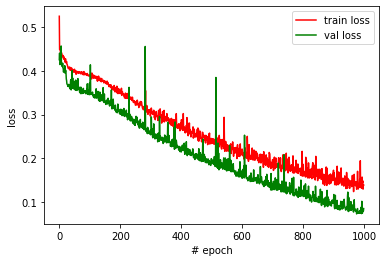

In [13]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='train loss')
plt.plot(history.history['val_loss'],'g',label='val loss')
plt.xlabel('# epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

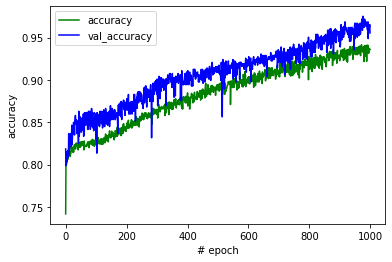

In [14]:
from matplotlib import pyplot as plt
plt.plot(model.history.history['accuracy'],'g',label='accuracy')
plt.plot(model.history.history['val_accuracy'],'b',label='val_accuracy')
plt.xlabel('# epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [15]:
model.save('EAR.model')

INFO:tensorflow:Assets written to: EAR.model\assets


INFO:tensorflow:Assets written to: EAR.model\assets


In [16]:
from sklearn.metrics import confusion_matrix
predicted_target=model.predict(test_data)

print(confusion_matrix(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1)))

[[324  16]
 [ 11 255]]


In [17]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

predicted_target=model.predict(test_data)
matrix=confusion_matrix(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1))

print(matrix)
print(classification_report(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1),target_names=['alert', 'drowsy']))

[[324  16]
 [ 11 255]]
              precision    recall  f1-score   support

       alert       0.97      0.95      0.96       340
      drowsy       0.94      0.96      0.95       266

    accuracy                           0.96       606
   macro avg       0.95      0.96      0.95       606
weighted avg       0.96      0.96      0.96       606



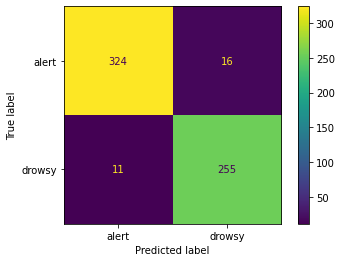

In [18]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['alert', 'drowsy'])
disp.plot()


In [19]:
# predicted_target=model.predict(test_data)